# Deep Learning 

In [1]:
import tensorflow as tf
from tensorflow              import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Input

In [2]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
DC = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", header = None)
columns = ['ID', 'AGE', 'GENDER', 'EDUCATION_LEVEL', 'COUNTRY', 'ETHNICITY', 'NSCORE_VALUE', 'ESCORE_VALUE', 'OSCORE_VALUE', 'ASCORE_VALUE', 
        'CSCORE_VALUE', 'IMPULSIVENESS', 'SENSATION_SEEING', 'ALCOHOL_CONSUMPTION', 'AMPHET_CONSUMPTION', 'AMYL_CONSUMPTION', 'BENZOS_CONSUMPTION', 
        'CAFFEINE_CONSUMPTION', 'CANNABIS_CONSUMPTION', 'CHOCOLATE_CONSUMPTION', 'COKE_CONSUMPTION', 'CRACK_CONSUMPTION', 'ECSTASY_CONSUMPTION', 
        'HEROIN_CONSUMPTION', 'KETAMINE_CONSUMPTION', 'LEGAL_HIGHS_CONSUMPTION', 'LSD_CONSUMPTION', 'METH_CONSUMPTION', 'MAGIC_MUSHROOMS_CONSUMPTION', 
        'NICOTINE_CONSUMPTION', 'SEMER_CONSUMPTION', 'VSA_CONSUMPTION']
DC.columns = columns

In [3]:
F = ['AGE', 'GENDER', 'EDUCATION_LEVEL', 'COUNTRY', 'ETHNICITY', 
    'NSCORE_VALUE', 'ESCORE_VALUE', 'OSCORE_VALUE', 'ASCORE_VALUE', 'CSCORE_VALUE', 'IMPULSIVENESS', 'SENSATION_SEEING']

P = ['ALCOHOL_CONSUMPTION', 'AMPHET_CONSUMPTION', 'AMYL_CONSUMPTION', 'BENZOS_CONSUMPTION', 
        'CAFFEINE_CONSUMPTION', 'CANNABIS_CONSUMPTION', 'CHOCOLATE_CONSUMPTION', 'COKE_CONSUMPTION', 'CRACK_CONSUMPTION', 'ECSTASY_CONSUMPTION', 
        'HEROIN_CONSUMPTION', 'KETAMINE_CONSUMPTION', 'LEGAL_HIGHS_CONSUMPTION', 'LSD_CONSUMPTION', 'METH_CONSUMPTION', 'MAGIC_MUSHROOMS_CONSUMPTION', 
        'NICOTINE_CONSUMPTION', 'SEMER_CONSUMPTION', 'VSA_CONSUMPTION']

for k in P:
    DC[k] = DC[k].apply(lambda x : 1 if x == "CL6" else 0)

print(DC[(DC['CANNABIS_CONSUMPTION'] == 1)]['CANNABIS_CONSUMPTION'])


X = DC[F].values
Y = DC[P].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

17      1
27      1
64      1
100     1
104     1
       ..
1873    1
1876    1
1879    1
1882    1
1883    1
Name: CANNABIS_CONSUMPTION, Length: 463, dtype: int64


In [4]:
model = keras.Sequential([
        keras.layers.Dense(10, input_dim = 12, activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(5, input_dim = 12, activation = 'relu'),
        keras.layers.Dense(5, activation = 'relu'),
        keras.layers.Dense(3, input_dim = 12, activation = 'relu'),
        keras.layers.Dense(3, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
        ])

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam', 
              metrics=['accuracy'])


In [6]:
history = model.fit(X_train, y_train[:,1], epochs = 100, batch_size = 10)


Epoch 1/100
151/151 [==============================] - 0s 570us/step - loss: 0.3162 - accuracy: 0.9516
Epoch 2/100
151/151 [==============================] - 0s 583us/step - loss: 0.1999 - accuracy: 0.9516
Epoch 3/100
151/151 [==============================] - 0s 594us/step - loss: 0.1885 - accuracy: 0.9516
Epoch 4/100
151/151 [==============================] - 0s 590us/step - loss: 0.1787 - accuracy: 0.9516
Epoch 5/100
151/151 [==============================] - 0s 596us/step - loss: 0.1731 - accuracy: 0.9516
Epoch 6/100
151/151 [==============================] - 0s 590us/step - loss: 0.1690 - accuracy: 0.9516
Epoch 7/100
151/151 [==============================] - 0s 583us/step - loss: 0.1642 - accuracy: 0.9516
Epoch 8/100
151/151 [==============================] - 0s 588us/step - loss: 0.1620 - accuracy: 0.9516
Epoch 9/100
151/151 [==============================] - 0s 570us/step - loss: 0.1596 - accuracy: 0.9516
Epoch 10/100
151/151 [==============================] - 0s 563us/step - l

KeyError: 'val_loss'

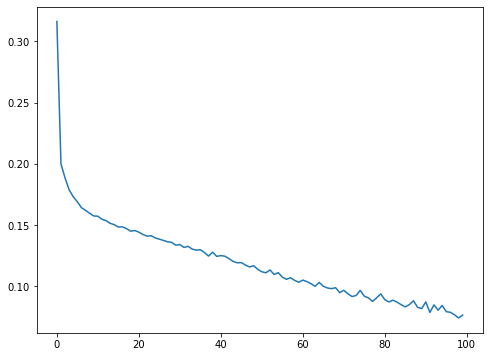

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],)
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

KeyError: 'val_accuracy'

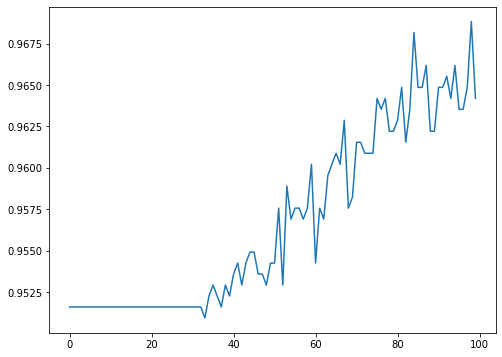

In [8]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)